In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons, make_circles

import math
import statistics
from collections import Counter
%matplotlib inline

In [17]:
job = pd.read_csv('./job.csv')

In [18]:
job.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,EMP,MEN,THND_PER,A,1965,3346.5,NaN
1,AUS,EMP,MEN,THND_PER,A,1966,3362.5,NaN
2,AUS,EMP,MEN,THND_PER,A,1967,3412.5,NaN
3,AUS,EMP,MEN,THND_PER,A,1968,3474.0,NaN
4,AUS,EMP,MEN,THND_PER,A,1969,3548.0,NaN


In [19]:
job.columns

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value', 'Flag Codes'],
      dtype='object')

In [20]:
job.dtypes

LOCATION       object
INDICATOR      object
SUBJECT        object
MEASURE        object
FREQUENCY      object
TIME           object
Value         float64
Flag Codes     object
dtype: object

In [73]:
job['LOCATION'].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CZE', 'DNK', 'FIN', 'FRA', 'DEU',
       'GRC', 'HUN', 'ISL', 'IRL', 'ITA', 'JPN', 'KOR', 'LUX', 'MEX',
       'NLD', 'NZL', 'NOR', 'POL', 'PRT', 'SVK', 'ESP', 'SWE', 'CHE',
       'TUR', 'GBR', 'USA', 'BRA', 'CHL', 'EST', 'IDN', 'ISR', 'RUS',
       'SVN', 'ZAF', 'EU28', 'OECD', 'G-7', 'EA19', 'COL', 'LVA', 'LTU'],
      dtype=object)

In [ ]:
len(job['LOCATION'].unique())

## 결측값 많은 칼럼 제거

In [23]:
del job['Flag Codes']

In [24]:
job.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value
0,AUS,EMP,MEN,THND_PER,A,1965,3346.5
1,AUS,EMP,MEN,THND_PER,A,1966,3362.5
2,AUS,EMP,MEN,THND_PER,A,1967,3412.5
3,AUS,EMP,MEN,THND_PER,A,1968,3474.0
4,AUS,EMP,MEN,THND_PER,A,1969,3548.0


# 국가별로 취업률의 평균값으로 그룹을 함

In [25]:
job_country = job.groupby('LOCATION').mean()
job_country

,Value
LOCATION,
AUS,3064.879287
AUT,1700.325711
BEL,1798.528642
BRA,20986.833766
CAN,5800.496382
CHE,1535.724172
CHL,2815.209330
COL,6779.488322
CZE,1831.327416


# 취업률의 범위(최대 취업률-최소취업률)

In [96]:
job_df.max() - job_df.min()

219941.5

# 전체나라 취업 현황

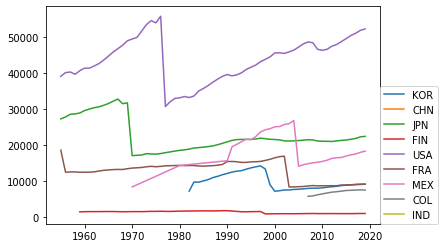

In [112]:
plt.plot( 'TIME_encode', 'Value' ,data=job_df[job_df['LOCATION'] == 'KOR'], label='KOR')
plt.plot('TIME_encode', 'Value' ,data=job_df[job_df['LOCATION'] == 'CHN'], label='CHN')

plt.plot('TIME_encode', 'Value' ,data=job_df[job_df['LOCATION'] == 'JPN'], label='JPN')
plt.plot('TIME_encode', 'Value' ,data=job_df[job_df['LOCATION'] =='FIN'], label='FIN')
plt.plot('TIME_encode', 'Value' ,data=job_df[job_df['LOCATION'] =='USA'], label='USA')
plt.plot('TIME_encode', 'Value' ,data=job_df[job_df['LOCATION'] == 'FRA'], label='FRA')

plt.plot('TIME_encode', 'Value' ,data=job_df[job_df['LOCATION'] == 'MEX'], label='MEX')
plt.plot('TIME_encode', 'Value' ,data=job_df[job_df['LOCATION'] == 'COL'], label='COL')
plt.plot('TIME_encode', 'Value' ,data=job_df[job_df['LOCATION'] == 'IND'], label='IND')

plt.legend(loc=[1,0])

## 취업률 상위,하위 5개 국가

In [115]:
job_mean = job.groupby(['LOCATION']).mean()[['Value']].reset_index()

In [123]:
job_mean = job_mean.sort_values(by = 'Value', ascending=False)
job_mean.head()
# 내림차순

,LOCATION,Value
35,OECD,187015.539057
17,G-7,134205.335782
21,IDN,80663.068030
14,EU28,75389.786925
11,EA19,49792.021485


In [124]:
job_mean = job_mean.sort_values(by = 'Value', ascending=True)
job_mean.head()
# 오름차순

,LOCATION,Value
44,ZAF,43.349976
23,ISL,99.177498
29,LUX,112.717774
13,EST,252.570713
40,SVN,349.098680


# 남자와 여자의 취업정도

In [127]:
job_sex = job.groupby(['LOCATION', 'SUBJECT']).mean()[['Value']].reset_index()

In [140]:
job_sex = job_sex[(job_sex['SUBJECT'] == 'MEN') | (job_sex['SUBJECT'] == 'WOMEN')]
# 이번에는 년도를 합쳐 성별을 인덱스로 사용 가능하게 만듦

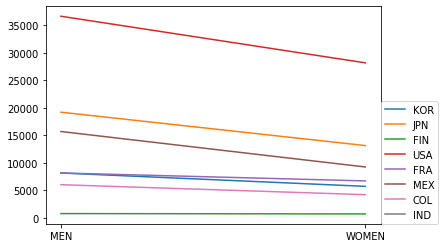

In [141]:
plt.plot('SUBJECT', 'Value', data=job_sex[job_sex['LOCATION'] == 'KOR'], label='KOR')
plt.plot('SUBJECT', 'Value', data=job_sex[job_sex['LOCATION'] == 'JPN'], label='JPN')
plt.plot('SUBJECT', 'Value', data=job_sex[job_sex['LOCATION'] == 'FIN'], label='FIN')
plt.plot('SUBJECT', 'Value', data=job_sex[job_sex['LOCATION'] == 'USA'], label='USA')
plt.plot('SUBJECT', 'Value', data=job_sex[job_sex['LOCATION'] == 'FRA'], label='FRA')

plt.plot('SUBJECT', 'Value', data=job_sex[job_sex['LOCATION'] == 'MEX'], label='MEX')
plt.plot('SUBJECT', 'Value', data=job_sex[job_sex['LOCATION'] == 'COL'], label='COL')
plt.plot('SUBJECT', 'Value', data=job_sex[job_sex['LOCATION'] ==  'IND'], label='IND')

plt.legend(loc=[1,0])

In [36]:
job['MEASURE'].unique()

array(['THND_PER', 'PC_WKGPOP'], dtype=object)

# TIME 칼럼 정제

In [60]:
job['TIME_encode'] = job['TIME'].apply(lambda x: int(x[:4]))

job[['TIME', 'TIME_encode']].sample()

,TIME,TIME_encode
8442,1983-Q4,1983


In [152]:
# 국가별로
job_time = job.groupby(['LOCATION', 'TIME_encode', 'MEASURE', 'SUBJECT'])['Value'].mean()
# job_time
job_df = pd.DataFrame(job_time).reset_index()
job_df.sample()

,LOCATION,TIME_encode,MEASURE,SUBJECT,Value
199,AUS,2004,THND_PER,MEN,5293.876412


### 1. 한국

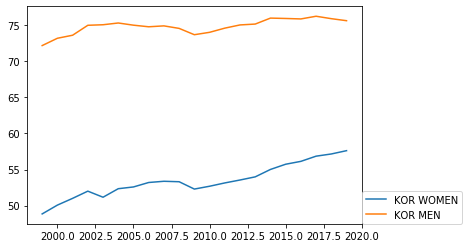

In [154]:
plt.plot('TIME_encode', 'Value', data=job_df[(job_df['LOCATION'] == 'KOR') & (job_df['SUBJECT'] == 'WOMEN') & (job_df['MEASURE'] == 'PC_WKGPOP')], label='KOR WOMEN')
plt.plot('TIME_encode', 'Value', data=job_df[(job_df['LOCATION'] == 'KOR') & (job_df['SUBJECT'] == 'MEN') & (job_df['MEASURE'] == 'PC_WKGPOP')], label='KOR MEN')
plt.legend(loc=[1,0])

### 2. 일본

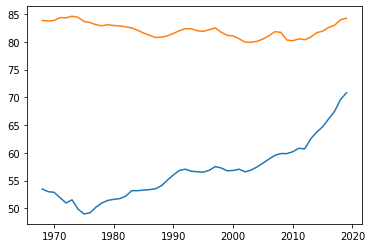

In [156]:
plt.plot('TIME_encode', 'Value', data=job_df[(job_df['LOCATION'] == 'JPN') & (job_df['SUBJECT'] == 'WOMEN') & (job_df['MEASURE'] == 'PC_WKGPOP')], label='JPN WOMEN')
plt.plot('TIME_encode', 'Value', data=job_df[(job_df['LOCATION'] == 'JPN') & (job_df['SUBJECT'] == 'MEN') & (job_df['MEASURE'] == 'PC_WKGPOP')], label='JPN MEN')

### 3. EU

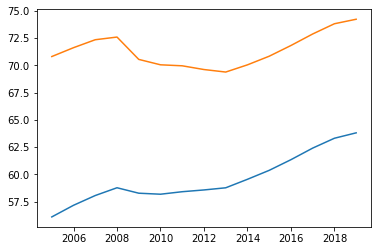

In [157]:
plt.plot('TIME_encode', 'Value', data=job_df[(job_df['LOCATION'] == 'EU28') & (job_df['SUBJECT'] == 'WOMEN') & (job_df['MEASURE'] == 'PC_WKGPOP')], label='EU28 WOMEN')
plt.plot('TIME_encode', 'Value', data=job_df[(job_df['LOCATION'] == 'EU28') & (job_df['SUBJECT'] == 'MEN') & (job_df['MEASURE'] == 'PC_WKGPOP')], label='EU28 MEN')

### 4. 프랑스

In [172]:
job_df[job_df['LOCATION'] == 'FRA'].head()

,LOCATION,TIME_encode,MEASURE,SUBJECT,Value
2890,FRA,1955,THND_PER,TOT,18539.0
2891,FRA,1956,THND_PER,MEN,12407.0
2892,FRA,1956,THND_PER,TOT,18584.0
2893,FRA,1956,THND_PER,WOMEN,6178.0
2894,FRA,1957,THND_PER,MEN,12393.0


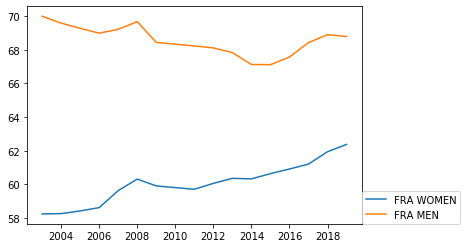

In [169]:
plt.plot('TIME_encode', 'Value', data=job_df[(job_df['LOCATION'] == 'FRA') & (job_df['SUBJECT'] == 'WOMEN') & (job_df['MEASURE'] == 'PC_WKGPOP')], label='FRA WOMEN')
plt.plot('TIME_encode', 'Value', data=job_df[(job_df['LOCATION'] == 'FRA') & (job_df['SUBJECT'] == 'MEN') & (job_df['MEASURE'] == 'PC_WKGPOP')], label='FRA MEN')
plt.legend(loc=[1,0])

In [ ]:
#남여 취업률 합쳐서 박스플롯

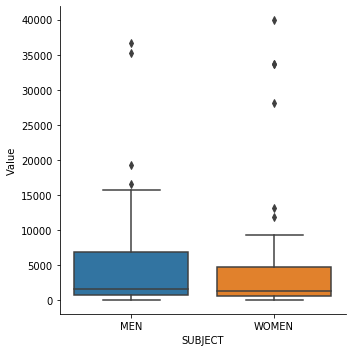

In [168]:
sns.catplot(x = 'SUBJECT', y ='Value', data = job_sex[job_sex['Value'] < 40000], kind = 'box')